# Data Cleaning and Resampling

---
## Essential Lbraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler

sb.set()
plt.style.use('seaborn-v0_8-bright')
plt.rcParams['figure.dpi'] = 300

---
## Helper functions

In [3]:
def concatXY(X, y):
    return pd.concat([X, y], axis = 1).rename(columns = {'quality': 'good'})


def create_count_plot(df, ax, title):
    sb.countplot(x = df, ax = ax)
    ax.set_xlabel(title ,fontsize = 15)
    ax.set(xticklabels = ['Not Good', 'Good'])

In [4]:
# for col in numericCols:
#     f, ax= plt.subplots(figsize=(48, 48))
#     sb.boxplot(x = col, y = "quality", data = data, orient = "h")
#     ax.tick_params(axis='y', labelsize=40)
#     ax.tick_params(axis='x', labelsize=40)
#     ax.set_xlabel(col,fontsize=50)
#     ax.set_ylabel("quality",fontsize=50)
#     # plt.legend(fontsize=40)
#     plt.show()

In [5]:
# f, axes = plt.subplots(12, 3, figsize=(18, 60))

# count = 0
# for var in data:
#     sb.boxplot(data = data[var], orient = "h", ax = axes[count,0])
#     sb.histplot(data = data[var], ax = axes[count,1])
#     sb.violinplot(data = data[var], orient = "h", ax = axes[count,2])
#     count += 1

---
## Import Data

In [6]:
data = pd.read_csv('datasets/wine_quality.csv', sep=';')
randomState = 20
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


---
## Converting Response Data

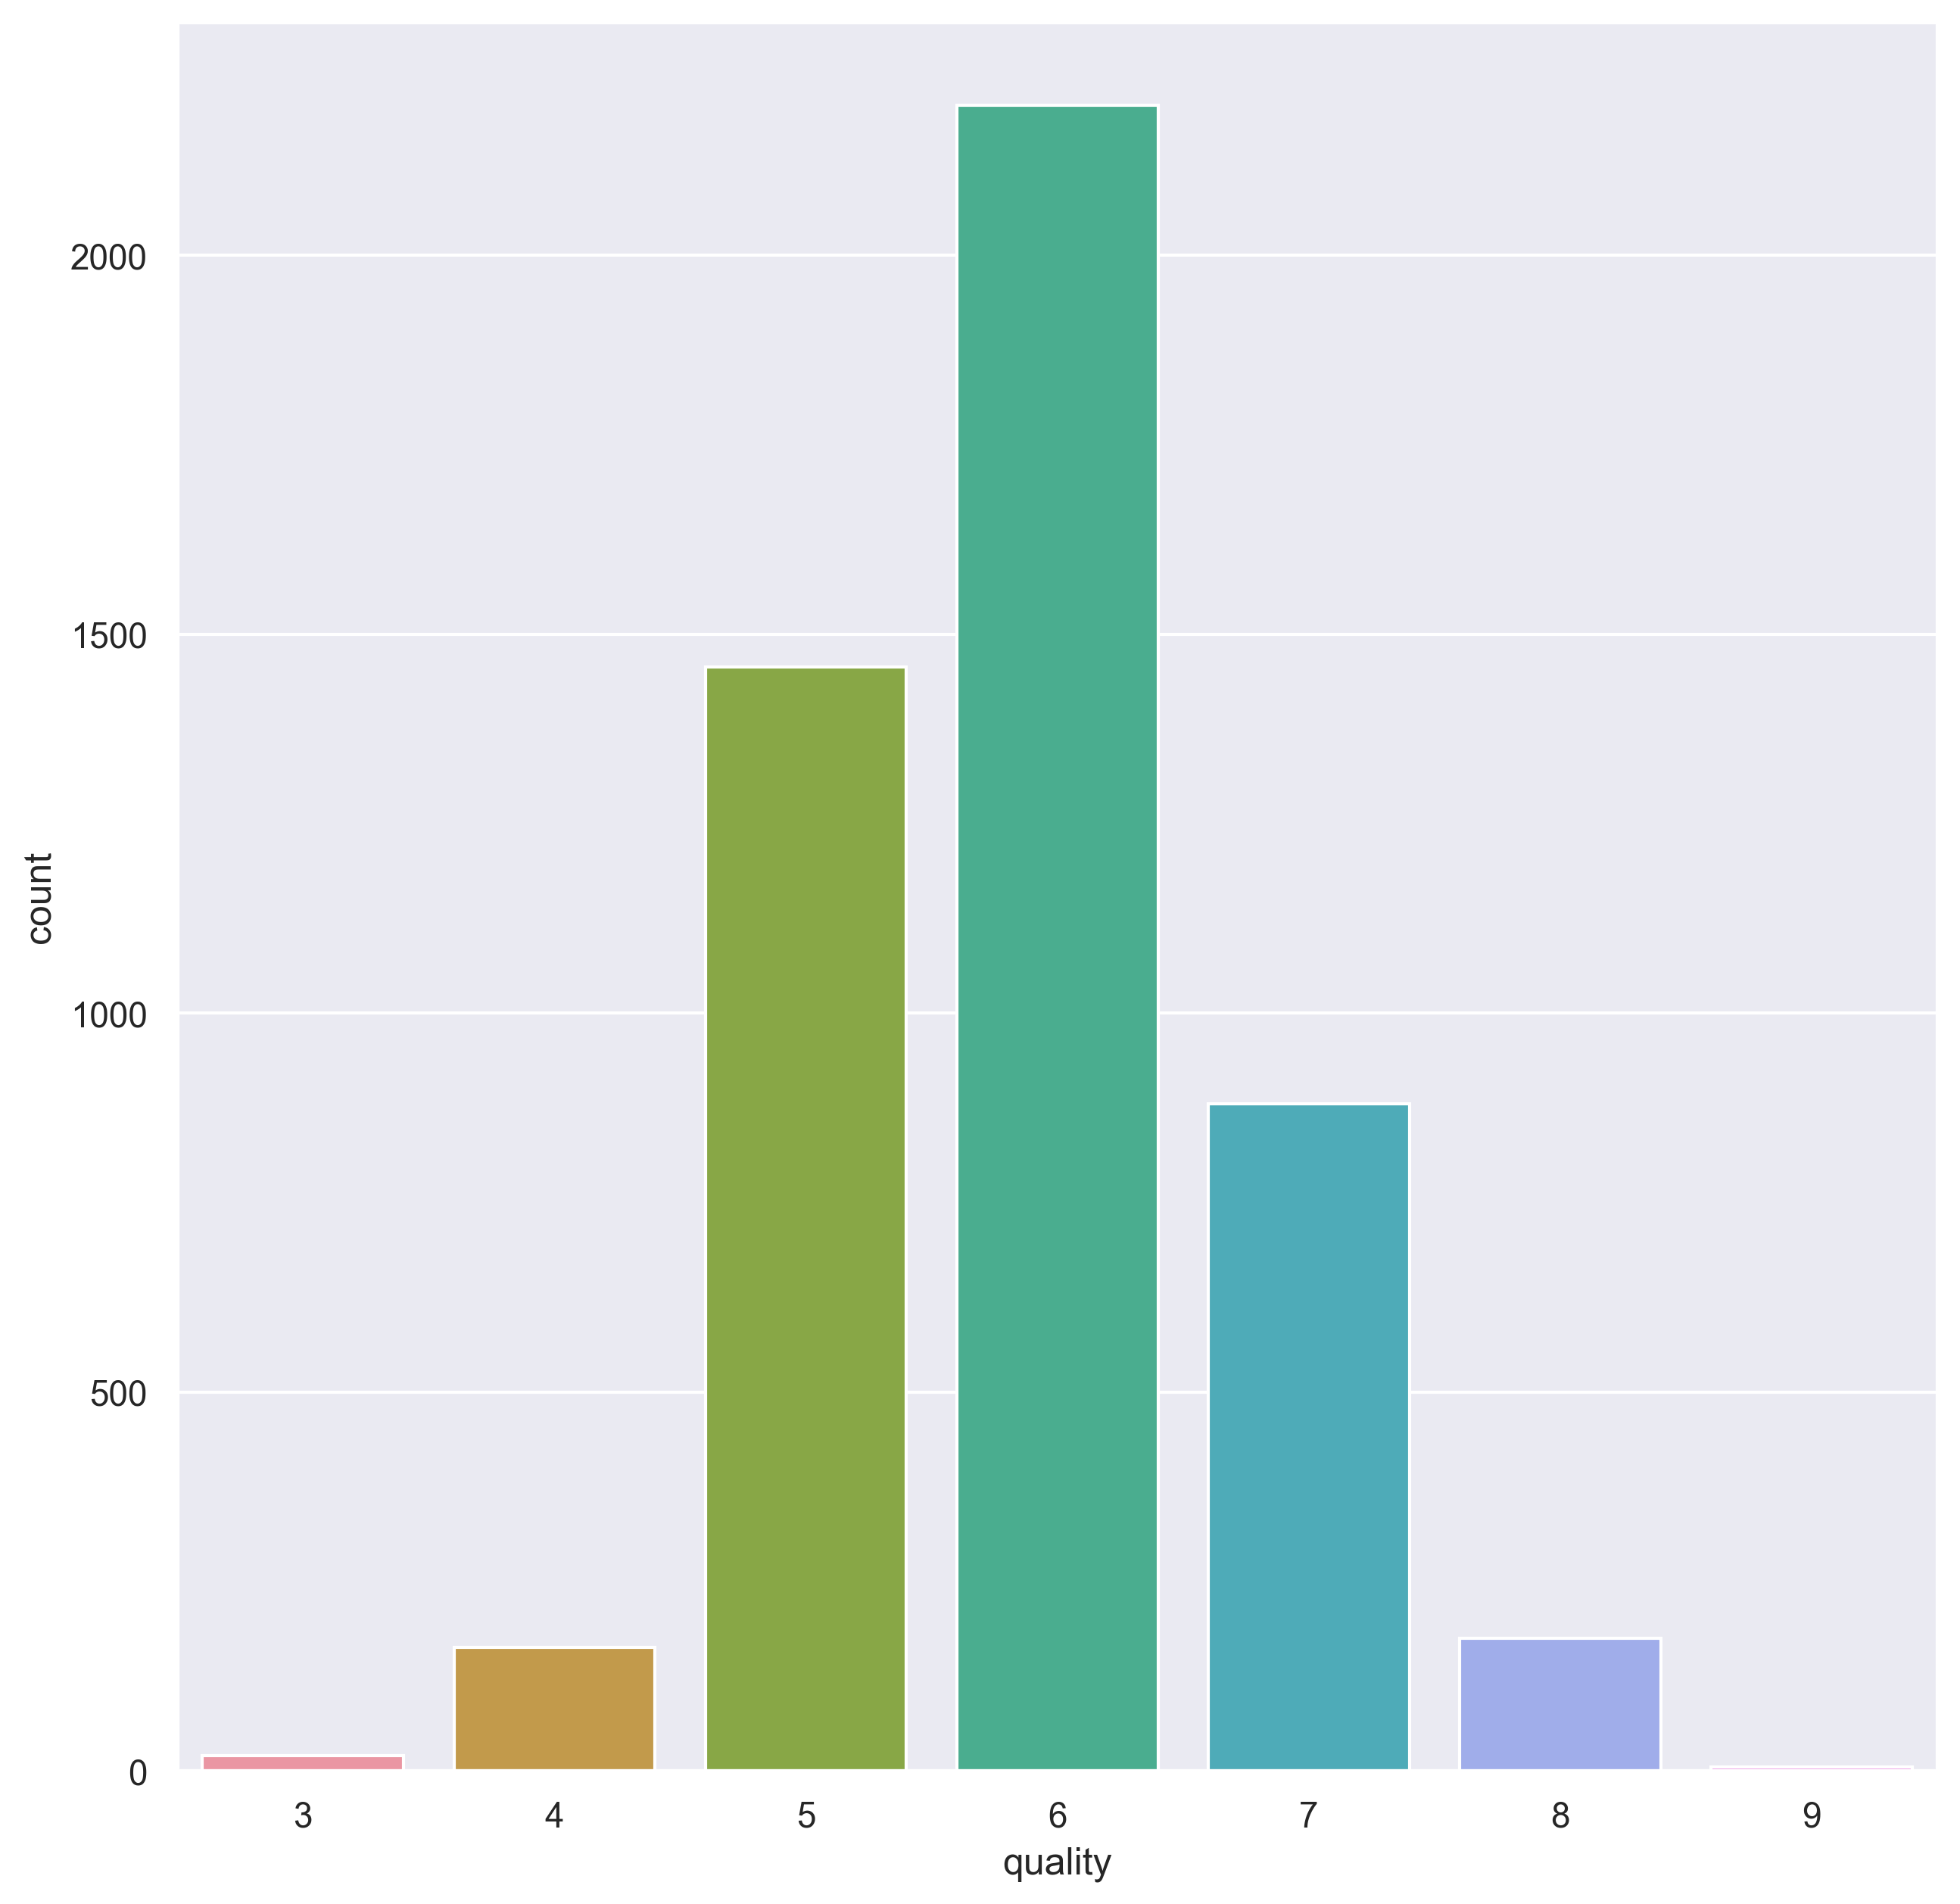

In [16]:
fig = plt.figure(figsize = (10, 10))
sb.countplot(x = data['quality'])
plt.show()

In [8]:
minQuality = np.percentile(data["quality"], 80)
print(f'Any wine with a minimum quality of {minQuality} is good.')

Any wine with a minimum quality of 7.0 is good.


In [9]:
newData = data.copy()
newData['quality'] = (newData['quality'] >= minQuality).astype('int64')
newData['quality'].value_counts()

0    3838
1    1060
Name: quality, dtype: int64

---
## Splitting Train and Test Data

In [10]:
X, y = newData.iloc[:, :-1], newData.iloc[:, -1]
XTrain, XTest, yTrain, yTest = train_test_split(X, y, train_size = 0.7, random_state = randomState)
train = concatXY(XTrain, yTrain)
test = concatXY(XTest, yTest)
train['good'].value_counts()

0    2679
1     749
Name: good, dtype: int64

---
## Resampling of Train Data

### 1. Random Oversampling

In [11]:
overSmp = RandomOverSampler(sampling_strategy = 0.5, random_state = randomState)
XRes, yRes = overSmp.fit_resample(XTrain, yTrain)
oversampledTrainDf = concatXY(XRes, yRes)
oversampledTrainDf['good'].value_counts()

0    2679
1    1339
Name: good, dtype: int64

### 2. SMOTEENN Resampling

In [12]:
# Set random_state for reproducibility
sme = SMOTEENN(random_state = randomState)
XRes, yRes = sme.fit_resample(XTrain, yTrain)
smoteennTrainDf = concatXY(XRes, yRes)
smoteennTrainDf['good'].value_counts()

1    2192
0    1566
Name: good, dtype: int64

### 3. SMOTETomek Resampling

In [13]:
smt = SMOTETomek(random_state = randomState)
XRes, yRes = smt.fit_resample(XTrain, yTrain)
smotetomekTrainDf = concatXY(XRes, yRes)
smotetomekTrainDf['good'].value_counts()

1    2621
0    2621
Name: good, dtype: int64

---
## Visualisation of Resampled Data

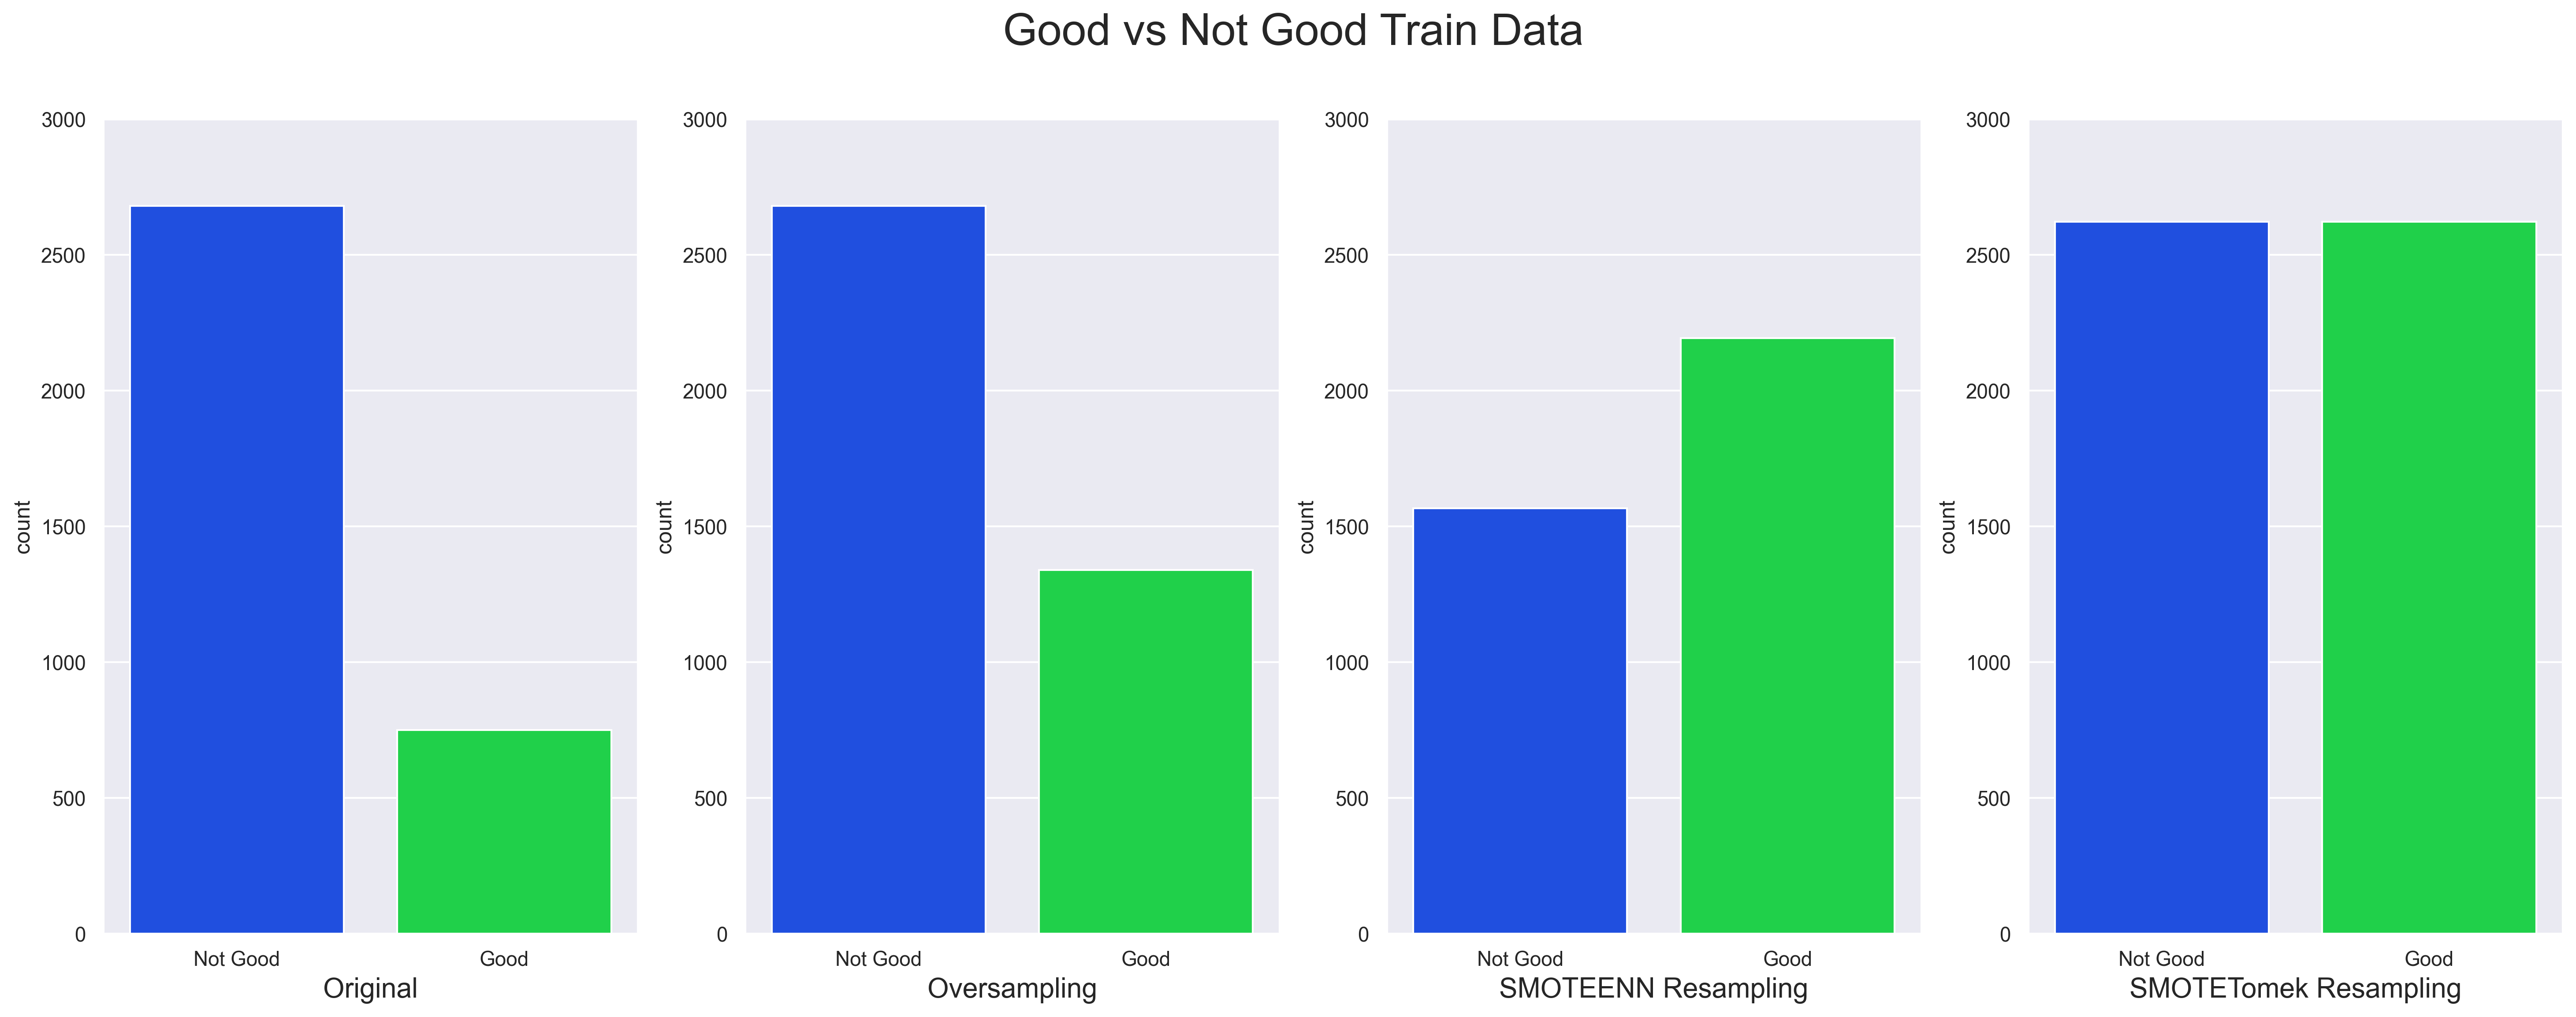

In [14]:
fig, axes = plt.subplots(1, 4, figsize = (24,8))
plt.suptitle("Good vs Not Good Train Data", fontsize = 24)
plt.setp(axes, ylim = (0, 3000))
create_count_plot(train['good'], axes[0], 'Original')
create_count_plot(oversampledTrainDf['good'], axes[1], 'Oversampling')
create_count_plot(smoteennTrainDf['good'], axes[2], 'SMOTEENN Resampling')
create_count_plot(smotetomekTrainDf['good'], axes[3], 'SMOTETomek Resampling')
plt.show()

---
## Export Data

In [15]:
train.to_csv('datasets/train.csv')
test.to_csv('datasets/test.csv')
oversampledTrainDf.to_csv('datasets/oversampled_train.csv')
smoteennTrainDf.to_csv('datasets/smoteenn_train.csv')
smotetomekTrainDf.to_csv('datasets/smotetomek_train.csv')